<a href="https://colab.research.google.com/github/ParamAhuja/DL_Notebooks/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# df

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ParamAhuja/DL_Notebooks/refs/heads/main/datasets/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


# null, duplicated, imbalance and encoding (ideally EDA is required too)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = pd.get_dummies(df, columns = ["Geography", "Gender"], drop_first = True)

In [ ]:
X = df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
y = df['Exited']

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
df["Exited"].value_counts()
# imbalaced but whatever

,count
Exited,
0,7963
1,2037


# tts and normalising

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,True,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,True,True
6087,561,27,9,135637.00,1,1,0,153080.40,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,False,False,False
5390,735,38,1,0.00,3,0,0,92220.12,False,False,False
860,667,43,8,190227.46,1,1,0,97508.04,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential # Seuential and NonSeuential - Two types
from tensorflow.keras.layers import Dense
# Just your regular densely-connected NN layer.
# Dense implements the operation:
# output = activation(dot(input, kernel) + bias)

In [ ]:
model = Sequential()
model.add(
    Dense (
      3, input_dim = X_train.shape[1], activation = "sigmoid"
    )
)    # Layer 1, connected to input

model.add(
    Dense (
      1, activation = "sigmoid"
    )
)    # Layer 2, connected to output Layer


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Dense name=dense_5, built=True>, <Dense name=dense_6, built=True>]

In [ ]:
model.count_params()

40

In [ ]:
# model.compile(loss = "binary_crossentropy", optimizer = "Adam")
# model.fit(X_train, y_train, epochs = 10)

if training_accuracy (accuracy) increases but val_accuracy stays the same, it is overfitting

also, return is histrorical accuracies as seen while training

In [ ]:
epoch = 100
model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = epoch, validation_split=0.2)

Epoch 1/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8461 - loss: 0.3767 - val_accuracy: 0.8531 - val_loss: 0.3719
Epoch 2/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8416 - loss: 0.3821 - val_accuracy: 0.8531 - val_loss: 0.3720
Epoch 3/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.3849 - val_accuracy: 0.8525 - val_loss: 0.3719
Epoch 4/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8480 - loss: 0.3703 - val_accuracy: 0.8531 - val_loss: 0.3717
Epoch 5/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8405 - loss: 0.3851 - val_accuracy: 0.8544 - val_loss: 0.3717
Epoch 6/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8443 - loss: 0.3775 - val_accuracy: 0.8544 - val_loss: 0.3715
Epoch 7/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8382 - loss: 0.3915 - val_accuracy: 0.8550 - val_loss: 0.3716
Epoch 8/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8482 - loss: 0.3767 - val_accuracy: 0.

In [ ]:
w, b = model.layers[0].get_weights()
w, b

(array([[-0.05873073,  0.12172052,  0.05479325],
        [ 0.6865808 , -3.2735274 , -0.1299618 ],
        [ 0.13532262, -0.04151935,  0.04892331],
        [ 1.5632945 , -0.4873399 , -0.7954515 ],
        [ 3.9932303 , -0.64159125, -1.0198368 ],
        [ 0.01096111, -0.11799493,  0.15143794],
        [ 0.48967555, -0.56843555,  1.9778838 ],
        [-0.09998893,  0.1526159 , -0.15269724],
        [-1.2224587 ,  0.14561793, -0.4950067 ],
        [ 0.09540375,  0.01427592, -0.33201808],
        [-0.1524097 ,  0.19346075,  0.9698032 ]], dtype=float32),
 array([2.1634824 , 0.4667839 , 0.24783501], dtype=float32))

In [ ]:
print("w, b: ")
for i in range(w.shape[1]):
  # print(1)
  # print("\n")
  for j in range(w.shape[0]):
    print(f"{w[j][i]:.2f}", sep = "", end = "  ")
  print("", end = " ,   ")
  print(b[i])


w, b: 
0.20  -0.82  -0.17  -0.06  1.01  0.19  0.87  -0.17  -0.43  -0.17  0.03   ,   0.4262277
0.15  -1.66  0.30  -0.16  -0.08  -0.26  0.40  0.18  -0.45  -0.11  0.62   ,   0.04819806
-0.22  -0.76  -0.23  -0.35  -0.20  0.47  0.65  -0.24  -0.99  0.44  0.46   ,   0.022616556


In [ ]:
result = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


select threshold by AUC curve

In [ ]:
import numpy as np
y_hat = np.array(result>0.5, dtype = np.int64)

In [ ]:
y_hat

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.8475

change
- epochs
- activation function
- no. of nodes
- threshold
- no. of layers

# visuals - training

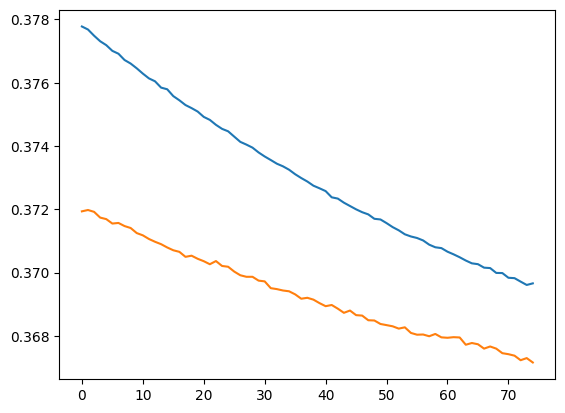

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

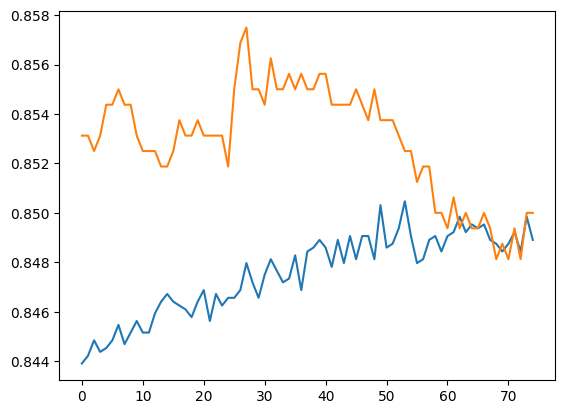

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

in case of overfitting, regularization and dropout ...

# visuals -nn (use netron website)

In [ ]:
history

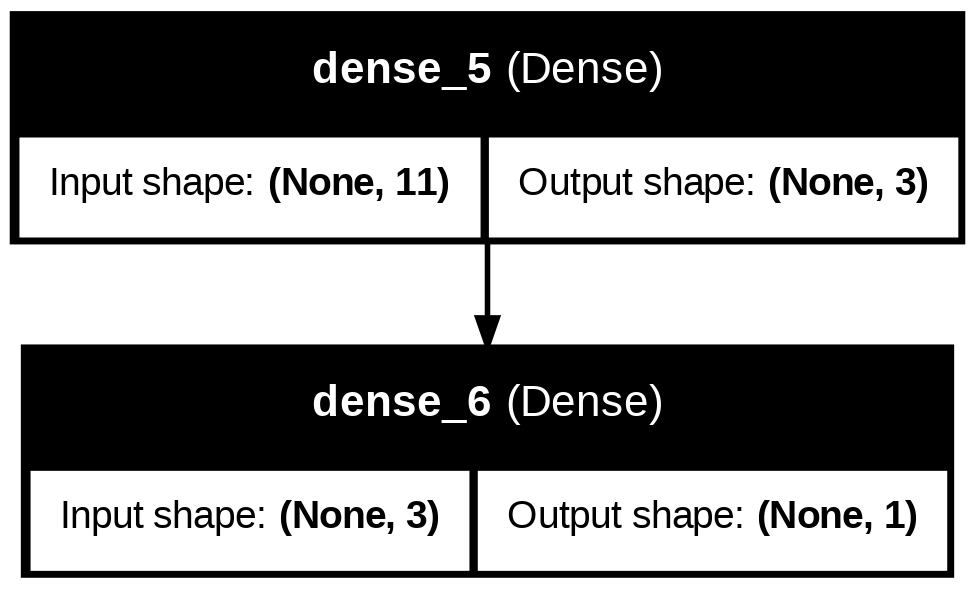

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display in Colab
from IPython.display import Image
Image(filename='model.png')


In [ ]:
# import torch
# import torch.nn as nn
# from torchviz import make_dot

# # Define a simple PyTorch model
# class SimpleModel(nn.Module):
#     def __init__(self):
#         super(SimpleModel, self).__init__()
#         self.fc1 = nn.Linear(16, 32)
#         self.fc2 = nn.Linear(32, 64)
#         self.fc3 = nn.Linear(64, 1)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         return torch.sigmoid(self.fc3(x))

# model = SimpleModel()

# # Create a dummy input tensor
# x = torch.randn(1, 16)

# # Generate graph
# y = model(x)
# make_dot(y, params=dict(model.named_parameters())).render("pytorch_model", format="png")

# # Display in Colab
# from IPython.display import Image
# Image(filename="pytorch_model.png")


[11, 3, 1]


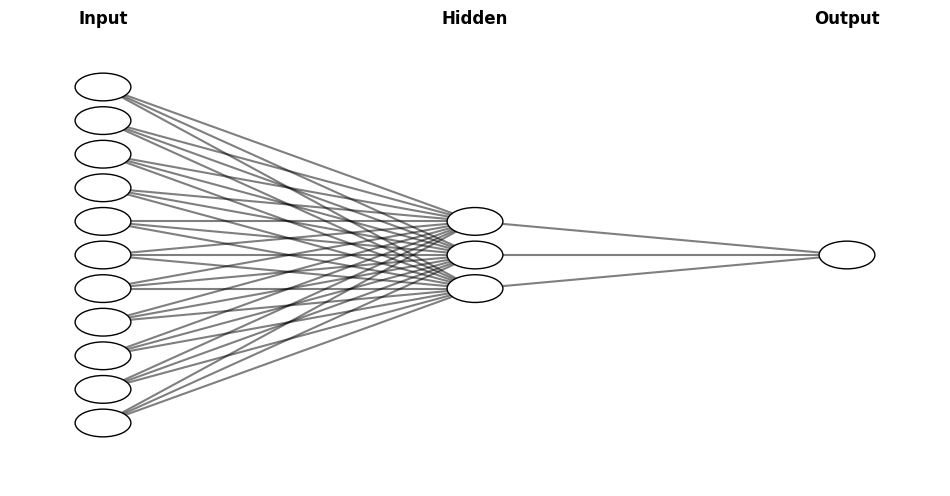

In [ ]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, layer_labels=None):
    '''
    Draw a simple feedforward neural network with matplotlib.

    ax: matplotlib Axes object
    left, right, bottom, top: boundaries of the drawing space
    layer_sizes: list of number of neurons in each layer
    layer_labels: optional list of strings for layer names
    '''
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for i, n in enumerate(layer_sizes):
        layer_top = v_spacing * (n - 1) / 2. + (top + bottom) / 2.
        for j in range(n):
            circle = plt.Circle((left + i * h_spacing, layer_top - j * v_spacing), 0.03,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)

    # Edges
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (n_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (n_b - 1) / 2. + (top + bottom) / 2.
        for j in range(n_a):
            for k in range(n_b):
                line = plt.Line2D([left + i * h_spacing, left + (i + 1) * h_spacing],
                                  [layer_top_a - j * v_spacing, layer_top_b - k * v_spacing],
                                  c='k', alpha=0.5)
                ax.add_artist(line)

    # Labels
    if layer_labels:
        for i, label in enumerate(layer_labels):
            ax.text(left + i * h_spacing, top + 0.1, label, ha='center', fontsize=12, weight='bold')

# Plot the network
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
ax.axis('off')


layer_sizes = []

# Add input dimension
layer_sizes.append(model.input_shape[1])

# Add output units from each layer
for layer in model.layers:
    try:
        layer_sizes.append(layer.output.shape[1])
    except AttributeError:
        continue
print(layer_sizes)

# Example: 3-layer NN with 3 input, 5 hidden, and 2 output neurons
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes, layer_labels=["Input", "Hidden", "Output"])
plt.show()
